In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#import data
train = pd.read_csv('train_NIR5Yl1.csv')
test = pd.read_csv('test_8i3B3FC.csv')
sub_sample = pd.read_csv('sample_submission_OR5kZa5.csv')

In [7]:
#checking NAs
print(train.isnull().sum())
print(test.isnull().sum())
print(sub_sample.isnull().sum())

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64
ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64
ID         0
Upvotes    0
dtype: int64


In [8]:
# datatypes
print(train.dtypes)
print(test.dtypes)
print(sub_sample.dtypes)

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object
ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
dtype: object
ID         int64
Upvotes    int64
dtype: object


In [10]:
df = train.drop('ID', axis =1)

In [12]:
df.head(5)

,Tag,Reputation,Answers,Username,Views,Upvotes
0,a,3942.0,2.0,155623,7855.0,42.0
1,a,26046.0,12.0,21781,55801.0,1175.0
2,c,1358.0,4.0,56177,8067.0,60.0
3,a,264.0,3.0,168793,27064.0,9.0
4,c,4271.0,4.0,112223,13986.0,83.0


In [14]:
X = df.drop('Upvotes', axis=1)
y = df['Upvotes']

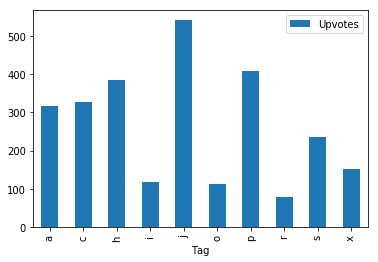

In [15]:
df[['Tag', 'Upvotes']].groupby('Tag').mean().plot.bar()

In [16]:
pd.__version__

'0.20.3'

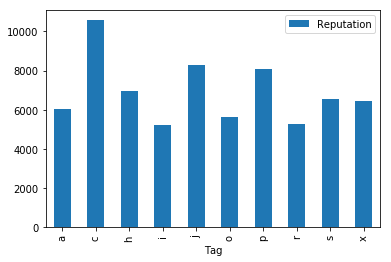

In [19]:
df[['Tag',  'Reputation']].groupby('Tag').mean().plot.bar()

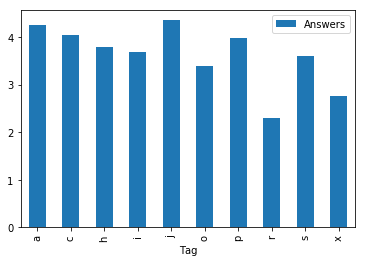

In [20]:
df[['Tag', 'Answers']].groupby('Tag').mean().plot.bar()

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [22]:
LEncoder = LabelEncoder()
OHEncoder = OneHotEncoder(sparse=False)

In [23]:
# limit to categorical data using df.select_dtypes()
X_2 = X.select_dtypes(include=[object])
X_2.head()
X_Tag = X_2.apply(LEncoder.fit_transform)

In [24]:
X_22 = train.select_dtypes(include=[object])
X_22.head()
X_Tag2 = X_22.apply(LEncoder.fit_transform)

In [25]:
OHEncoder.fit(X_Tag)
tag_encoded2 = OHEncoder.transform(X_Tag2)

In [26]:
OHEncoder.fit(X_Tag)
tag_encoded = OHEncoder.transform(X_Tag)

In [27]:
newtags = []
for i in range(10):
    newtags.append("Tag%d" %i)

In [28]:
newtags

['Tag0',
 'Tag1',
 'Tag2',
 'Tag3',
 'Tag4',
 'Tag5',
 'Tag6',
 'Tag7',
 'Tag8',
 'Tag9']

In [29]:
tag_encoded_df = pd.DataFrame(tag_encoded, columns=newtags)
tag_encoded_df.drop('Tag9', axis=1, inplace=True)

In [30]:
tag_encoded_df.head()

,Tag0,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X.drop('Tag', axis=1, inplace=True)


In [39]:
X = pd.concat([X, tag_encoded_df], axis=1)

In [40]:
X.head(10)

,Reputation,Answers,Username,Views,Tag0,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8
0,3942.0,2.0,155623,7855.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26046.0,12.0,21781,55801.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1358.0,4.0,56177,8067.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,264.0,3.0,168793,27064.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4271.0,4.0,112223,13986.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,440.0,1.0,23866,5577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,147.0,1.0,10759,17184.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2269.0,2.0,54623,312.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,111.0,2.0,172926,53738.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,2749.0,1.0,10189,227.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
### FREQUENCY ENCODING
# size of each category
encoding = X.groupby('Username').size()
# get frequency of each category
X['UsernameEnc'] = X.Username.map(encoding)

In [43]:

X.head()

,Reputation,Answers,Username,Views,Tag0,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,UsernameEnc
0,3942.0,2.0,155623,7855.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
1,26046.0,12.0,21781,55801.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,1358.0,4.0,56177,8067.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,264.0,3.0,168793,27064.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,4271.0,4.0,112223,13986.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


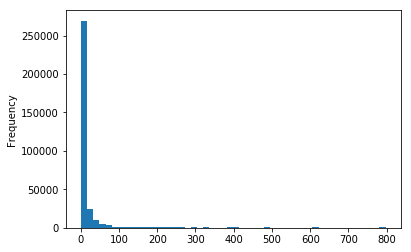

In [44]:
X.UsernameEnc.plot.hist(bins=50)

In [83]:
from sklearn.model_selection import train_test_split


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(297040, 14) (33005, 14) (297040,) (33005,)


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [87]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [88]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVR', SVR()))

In [89]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -9568268.294368 (4241841.658967)
LASSO: -9568474.859566 (4242132.272908)
EN: -9571351.041080 (4244087.547687)
KNN: -3923558.578474 (2460520.489935)
CART: -3207570.774276 (2037977.070729)


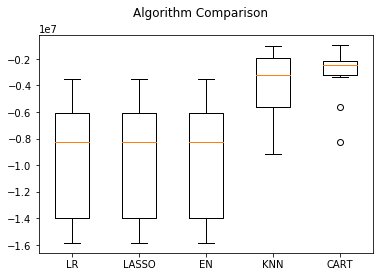

In [90]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [91]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
# pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [92]:
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -9568268.294368 (4241841.658967)
ScaledLASSO: -9568326.248537 (4242702.784773)
ScaledEN: -9943448.423835 (4513687.547594)
ScaledKNN: -3665948.571446 (1353400.940510)
ScaledCART: -3104914.118933 (2379267.154914)


In [57]:
model = RandomForestRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))

1865656.51961


In [94]:

scaler  =  StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model2 = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model2.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions2 = model2.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions2))

2476622.92212


In [95]:
np.sqrt(2476622.92212)

1573.7289862361943

In [96]:
cleantest = pd.read_csv('TestDataDF.csv')

In [97]:
cleantest.head()

,Unnamed: 0,Reputation,Answers,Username,Views,Tag0,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,UsernameEnc
0,0,-0.081543,-0.255734,-0.625867,0.041742,3.071288,-0.527522,-0.257286,-0.332746,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.298965
1,1,0.594400,0.582853,-0.890252,-0.337505,-0.325596,1.895656,-0.257286,-0.332746,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.036874
2,2,-0.250583,-0.814791,1.099883,-0.108028,-0.325596,-0.527522,-0.257286,3.005291,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.298965
3,3,-0.283044,0.582853,1.746318,-0.140874,-0.325596,-0.527522,-0.257286,3.005291,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.298965
4,4,-0.123463,1.700969,-0.567718,0.340957,-0.325596,-0.527522,-0.257286,3.005291,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.233442


In [103]:
cleantest.drop('Unnamed: 0', axis=1, inplace=True)

In [105]:
finalpredictions = model2.predict(cleantest)

In [115]:
predictions_DF = pd.DataFrame(finalpredictions, columns= ['Upvotes'])

In [120]:
sub = test['ID']

In [122]:
predictions_DF

,Upvotes
0,216.345247
1,46.374478
2,48.427049
3,32.048500
4,293.302581
5,12.266017
6,-10.968373
7,97.706434
8,87.029375
9,-9.980483


In [116]:
sub['Upvotes'] = predictions_DF

In [127]:
test['Upvotes'] = predictions_DF

In [126]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views,Pred
0,366953,a,5645.0,3.0,50652,33200.0,216.345247
1,71864,c,24511.0,6.0,37685,2730.0,46.374478
2,141692,i,927.0,1.0,135293,21167.0,48.427049
3,316833,i,21.0,6.0,166998,18528.0,32.048500
4,440445,i,4475.0,10.0,53504,57240.0,293.302581


In [129]:
SubDF = test[['ID', 'Upvotes']]

In [131]:
SubDF.to_csv('sub1.csv', doublequote=False, index=False)